In [1]:
import torch
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from tsai.callback.MVP import *
from fastcore.all import *

In [2]:
mask_future = False, # Mask future samples
mask_stateful = True, # True: mask stateful samples, False: mask individual time steps
mask_sync = False, # (only for multivariate ts) mask all variables at once
r = 0.3, # probability of masking in MVP

In [3]:
def create_mask(r, mask_future=False, mask_stateful=None, mask_sync=False, length=100):
    
    t = torch.rand(1, 3, length)
    
    if mask_future:
        mask = create_future_mask(t, r, sync=mask_sync)
    else:
        mask = create_subsequence_mask(t, r, stateful=mask_stateful, sync=mask_sync)
    fig, ax = plt.subplots(figsize=(10, 2))
    plt.pcolormesh(mask[0], cmap=colors.ListedColormap(['whitesmoke', 'orchid']))
    plt.title(f'r={r},  future={mask_future},  stateful={mask_stateful},  sync={mask_sync}')
    ax.set_ylabel('variables')
    plt.show()

In [4]:
length = 50

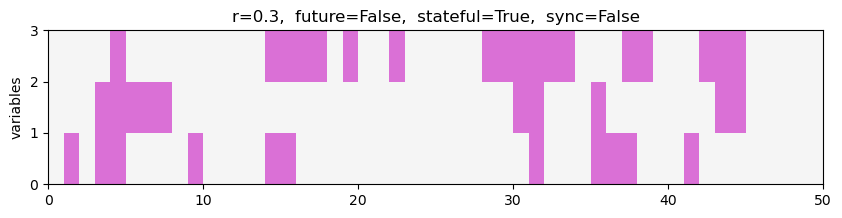

In [5]:
create_mask(r=0.3, mask_future=False, mask_stateful=True, mask_sync=False, length=length)

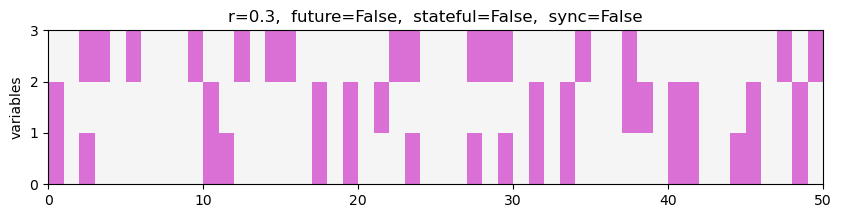

In [6]:
create_mask(r=0.3, mask_future=False, mask_stateful=False, mask_sync=False, length=length)

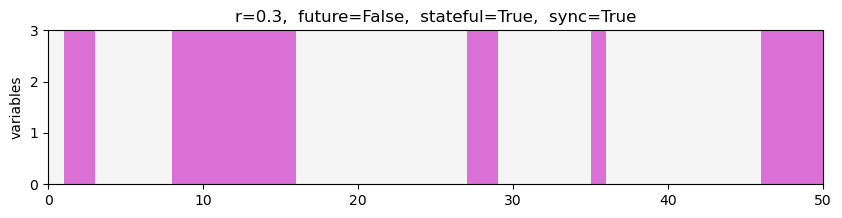

In [7]:
create_mask(r=0.3, mask_future=False, mask_stateful=True, mask_sync=True, length=length)

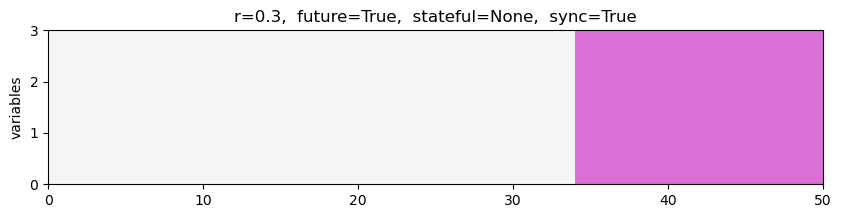

In [8]:
create_mask(r=0.3, mask_future=True, mask_stateful=None, mask_sync=True, length=length)

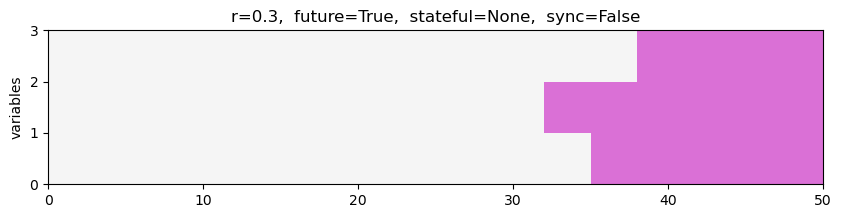

In [9]:
create_mask(r=0.3, mask_future=True, mask_stateful=None, mask_sync=False, length=length)

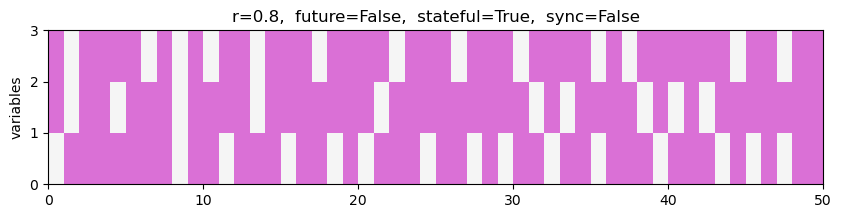

In [10]:
create_mask(r=0.8, mask_future=False, mask_stateful=True, mask_sync=False, length=length)